In [6]:
# importing required libraries
import twint                                 # to scrape twitter data without restrictions
import tweepy                                # to scrape user profile information
import nest_asyncio                          # to solve dependencies for twint

import json                                  # to read and convert tweets to json files
import numpy as np                           # for computations
import pandas as pd                          # to work with pandas dataframe
from scipy import stats                      # for trimmed mean
import re                                    # to clean the data
import preprocessor as s                     # basic tweet cleaning 

import matplotlib.pyplot as plt              # to plot graphs
from PIL import Image                        # support library for matplotlib

from datetime import date                    # to work with dates
import calendar                              # to extract day of the week

import nltk                                  # to perform major nlp transformations
from textblob import TextBlob                # for subjectivity and polarity
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords             # to extract stopwords
from nltk.stem import WordNetLemmatizer       # to lemmatize
from nltk.corpus import wordnet               # to access corpus

import tensorflow as tf                      # support library for Hugging Face Transformer 
from transformers import pipeline            # sentiment analysis using Hugging Face Transformers
nest_asyncio.apply() 

# FIRST PART

In [54]:
consumer_key = "2KUOJhYnuEn2uOryHs5z3snqS"
consumer_secret = "pKnpueu6UJtpaqKamnK2HttedaApDAo1exGl5TlH9f0aTeMdwp"
access_token =  "2581874418-xuYplEbldZQT31NxNTNUtGhlnTMzJqA4fu1HRmz"
access_token_secret = "oSMeGyXMlDiIZU2yt7vZqnW3nm7gAZYBhzAS1Aa7sqjhI"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)

api = tweepy.API(auth,wait_on_rate_limit = True)

In [55]:
# all profile information extracted using tweepy
screen_name = "Pepsi"
# fetching the user
user = api.get_user(screen_name)
# print(user._json.values())
for i,j in user._json.items():
    print(i,(34-len(i))*" ","->",j,'\n')

id                                  -> 18139619 

id_str                              -> 18139619 

name                                -> Pepsi 

screen_name                         -> pepsi 

location                            ->  

profile_location                    -> None 

description                         -> If you’re looking for hot takes and cold Pepsi, you’ve come to the right place. 

url                                 -> https://t.co/cvzvrOX7Kd 

entities                            -> {'url': {'urls': [{'url': 'https://t.co/cvzvrOX7Kd', 'expanded_url': 'http://www.pepsi.com', 'display_url': 'pepsi.com', 'indices': [0, 23]}]}, 'description': {'urls': []}} 

protected                           -> False 

followers_count                     -> 3024184 

friends_count                       -> 38598 

listed_count                        -> 5965 

created_at                          -> Mon Dec 15 16:26:23 +0000 2008 

favourites_count                    -> 6309 

utc_offset 

In [56]:
screen_name = "Cocacola"
# fetching the user
user = api.get_user(screen_name)
# print(user._json.values())
for i,j in user._json.items():
    print(i,(34-len(i))*" ","->",j,'\n')

id                                  -> 26787673 

id_str                              -> 26787673 

name                                -> Coca-Cola 

screen_name                         -> CocaCola 

location                            -> Atlanta, GA 

profile_location                    -> None 

description                         -> Have a Coke and a smile👇 

url                                 -> https://t.co/OzCFc0Gsyr 

entities                            -> {'url': {'urls': [{'url': 'https://t.co/OzCFc0Gsyr', 'expanded_url': 'https://CokeURL.com/HaveACokeDay2021', 'display_url': 'CokeURL.com/HaveACokeDay20…', 'indices': [0, 23]}]}, 'description': {'urls': []}} 

protected                           -> False 

followers_count                     -> 3321424 

friends_count                       -> 59048 

listed_count                        -> 12332 

created_at                          -> Thu Mar 26 16:36:42 +0000 2009 

favourites_count                    -> 23383 

utc_offset  

In [57]:
screen_name = "Sprite"
# fetching the user
user = api.get_user(screen_name)
# print(user._json.values())
for i,j in user._json.items():
    print(i,(34-len(i))*" ","->",j,'\n')

id                                  -> 90665957 

id_str                              -> 90665957 

name                                -> Sprite 

screen_name                         -> Sprite 

location                            -> Atlanta GA 

profile_location                    -> None 

description                         -> 2021 plans - Create. Act. Continue the fight. 

url                                 -> https://t.co/oYABIqHgXG 

entities                            -> {'url': {'urls': [{'url': 'https://t.co/oYABIqHgXG', 'expanded_url': 'http://SpriteURL.com/CopingSeason', 'display_url': 'SpriteURL.com/CopingSeason', 'indices': [0, 23]}]}, 'description': {'urls': []}} 

protected                           -> False 

followers_count                     -> 292250 

friends_count                       -> 393 

listed_count                        -> 804 

created_at                          -> Tue Nov 17 16:40:59 +0000 2009 

favourites_count                    -> 31831 

utc_of

In [7]:
# twint give users two options to scrape data: by cmd and by python script
# for this example i have used cmd to scrape data for all three companies. the query used it given below
"""
twint -u pepsi --lang en --limit 5000 --count -o pepsi_final.json --json
twint -u cocacola --lang en --limit 5000 --count -o cocacola_final.json --json
twint -u sprite --lang en --limit 5000 --count -o sprite_final.json --json


twint -g="37.0902, -95.7129,2000km" -s "sprite" --lang en --limit 5000 --count -o geo_data_usa_sprite.json --json
twint -g="37.0902, -95.7129,2000km" -s "pepsi" --lang en --limit 5000 --count -o geo_data_usa_pepsi.json --json
twint -g="37.0902, -95.7129,2000km" -s "cocacola" --lang en --limit 5000 --count -o geo_data_usa_cocacola.json --json

twint -s "pepsi" --verified --lang en --since 2021-04-01 --count -o demotry.json --json
twint -s "cocacola" --verified --lang en --since 2021-04-01 --count -o demotry.json --json
twint -s "sprite" --verified --lang en --since 2021-04-01 --count -o demotry.json --json

"""
df_pepsi = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/pepsi_final.json', lines=True)
df_cocacola = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/cocacola_final.json', lines=True)
df_sprite = pd.read_json('D:/SP Jain Year 3/Semester 6/Social Web Analytics/twint-master/twint-master/sprite_final.json', lines=True)

In [8]:
# printing shapes of the scraped df
full_df_list = [df_pepsi,df_cocacola,df_sprite]
for i in full_df_list:
    print(i.shape)

(5000, 36)
(5000, 36)
(5000, 36)


In [9]:
# extracting tweets by the respective companies
# twint doesn't allow to scrape just tweets instead it scrapes "tweets and replies" 
# the below code filters out all the tweets made by the company and not just replies

l_bool_pepsi = []
for i in range(len(df_pepsi)):
    l_bool_pepsi.append(df_pepsi.loc[i,]['reply_to'] == [])
new_df_pepsi = df_pepsi[l_bool_pepsi]

l_bool_cocacola = []
for i in range(len(df_cocacola)):
    l_bool_cocacola.append(df_cocacola.loc[i,]['reply_to'] == [])
new_df_cocacola = df_cocacola[l_bool_cocacola]

l_bool_sprite = []
for i in range(len(df_sprite)):
    l_bool_sprite.append(df_sprite.loc[i,]['reply_to'] == [])
new_df_sprite = df_sprite[l_bool_sprite]

full_new_df_list = [new_df_pepsi,new_df_cocacola,new_df_sprite]
for i in full_new_df_list:
    print(i.shape)
    

# the results show that pepsi is the brand that engages with consumers the most in comparison to other brands.
# however sprite focuses more on promotions by tweeting frequently and is less engaged with the consumers



(110, 36)
(422, 36)
(1276, 36)


'\nthe results show that pepsi is the brand that engages with consumers the most in comparison to other brands.\nhowever sprite focuses more on promotions by tweeting frequently and is less engaged with the consumers\n\n'

In [10]:
# FILTER FOR ENGLISH LANGUAGE TEXT USING THE TEXTBLOB FUNCTION
tex = 'Check out Dallas based fashion and portrait photographer Angela Webb () who specializes in bringing authentic, political and color striking images that center around the unique beauty and culture of women of color.'
wnl = WordNetLemmatizer()
def clean_text(x):
    
    tweet_text = x.lower()
    tweet_text = s.clean(tweet_text)
    tweet_text = re.sub(r'[^a-zA-Z ]+', '',tweet_text)
    tweet_text = nltk.word_tokenize(tweet_text)
    tweet_text = [w for w in tweet_text if w not in stopwords.words('english')]
    tweet_text = ' '.join([wnl.lemmatize(words) for words in tweet_text]) # without pos tagging
    return tweet_text

In [11]:
sentiment_analysis = pipeline("sentiment-analysis")
for i in full_new_df_list:
    i['cleaned_tweets'] = i['tweet'].apply(lambda x: clean_text(x))
    i['tokenized_comments'] = i['cleaned_tweets'].apply(lambda x: nltk.word_tokenize(x))
    i["Day_of_week"] = i["date"].apply(lambda x: calendar.day_name[x.weekday()])
    i['polarity_from_blob'] = i['cleaned_tweets'].apply(lambda x: TextBlob(clean_text(x)).sentiment[0]) 
    i['subjectivity'] = i['cleaned_tweets'].apply(lambda x: TextBlob(clean_text(x)).sentiment[1])
    i['transformer_score'] = i['cleaned_tweets'].apply(lambda x: sentiment_analysis(x))
    i.reset_index(drop=True, inplace=True)

Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized: ['dropout_39']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
D:\anaconda3

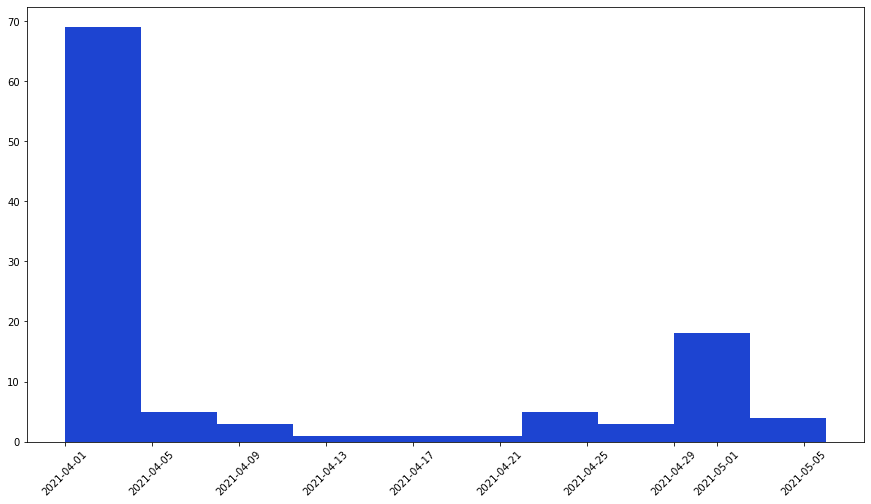

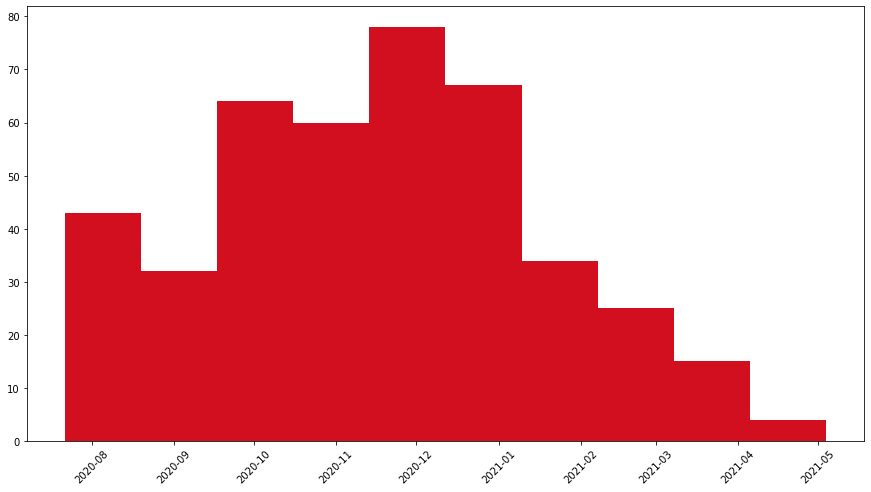

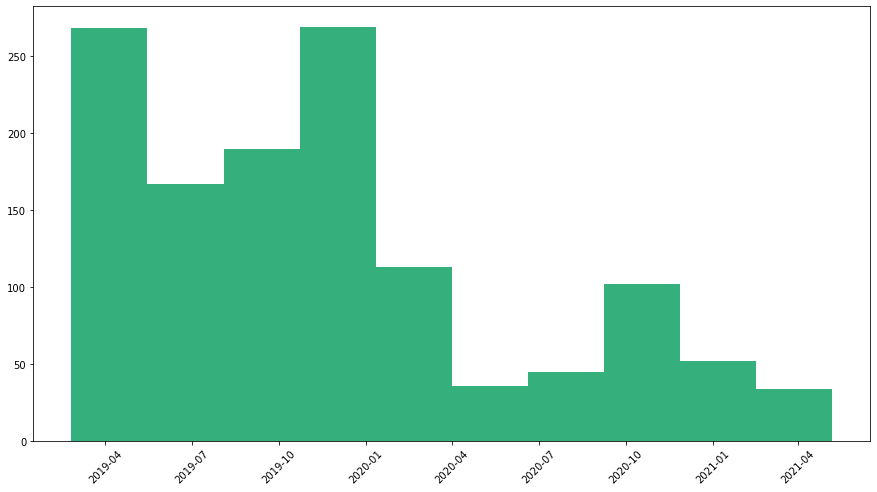

In [110]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
plt.hist(x=new_df_pepsi['date'],color=colors_for_bar[0])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,8))
plt.hist(x=new_df_cocacola['date'],color=colors_for_bar[1])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(15,8))
plt.hist(x=new_df_sprite['date'],color=colors_for_bar[2])
plt.xticks(rotation=45)
plt.show()

In [17]:
from collections import Counter
sam = [len(i) for i in new_df_pepsi['mentions']]
print(Counter(sam))

sam1 = [len(i) for i in new_df_cocacola['mentions']]
print(Counter(sam1))

sam2 = [len(i) for i in new_df_sprite['mentions']]
print(Counter(sam2))

"""
all 3 brands don't mention many people in their comments
"""

Counter({0: 104, 2: 3, 1: 3})
Counter({0: 403, 1: 15, 2: 4})
Counter({0: 1074, 1: 158, 2: 27, 3: 8, 4: 6, 9: 1, 5: 1, 6: 1})


"\nall 3 brands don't mention many people in their comments\n"

In [122]:
count = 0
for i in new_df_pepsi['photos']:
    if i != []:
        count+=1
print(count/len(new_df_pepsi['photos'])*100)

count = 0
for i in new_df_cocacola['photos']:
    if i != []:
        count+=1
print(count/len(new_df_cocacola['photos'])*100)

count = 0
for i in new_df_sprite['photos']:
    if i != []:
        count+=1
print(count/len(new_df_sprite['photos'])*100)

"""
sprite uses most images across all other brands

"""

4.545454545454546
6.6350710900473935
11.363636363636363


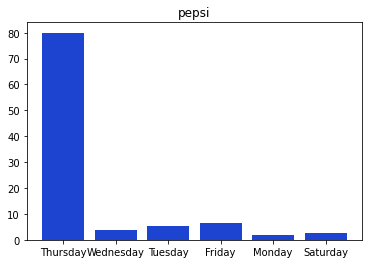

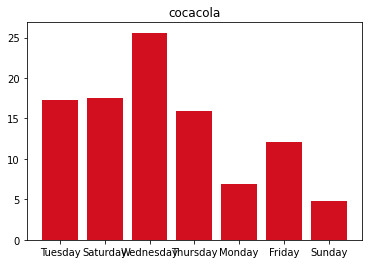

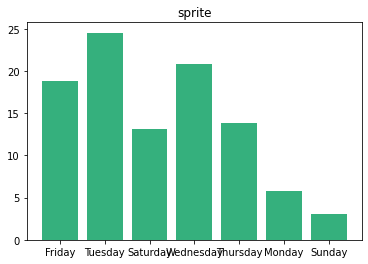

In [107]:
t = ["pepsi","cocacola","sprite"]
colors_for_bar = ["#1d44d1","#d10f1f","#35b07d"]

for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    trying = dict(Counter(i.Day_of_week))
    plt.bar(trying.keys(),[i/sum(trying.values())*100 for i in trying.values()],color=j)
    plt.title(f"{k}")
    plt.show()
 

In [58]:
plt.hist?

**************


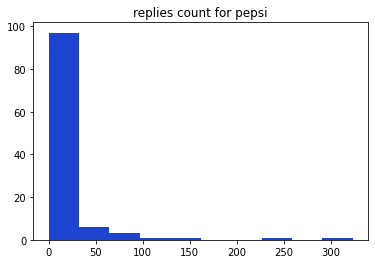

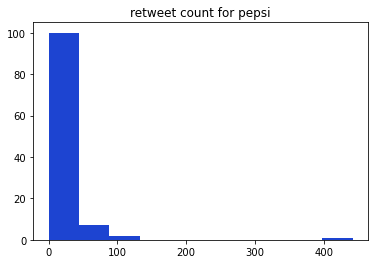

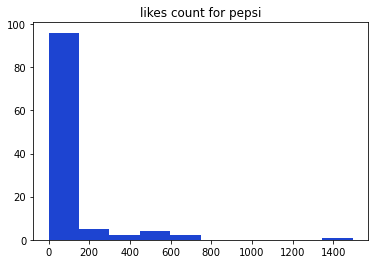

**************


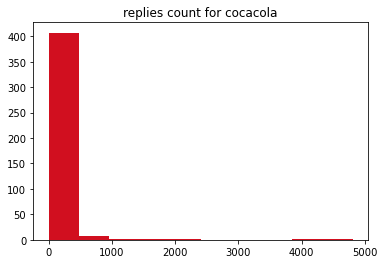

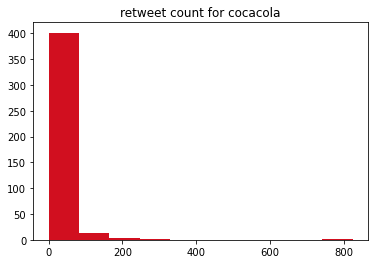

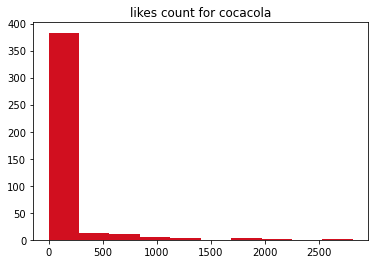

**************


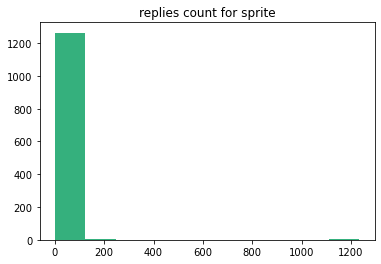

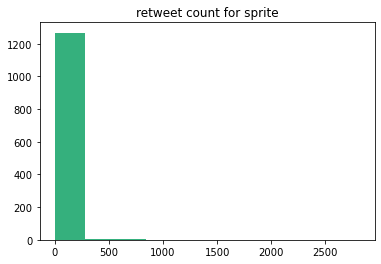

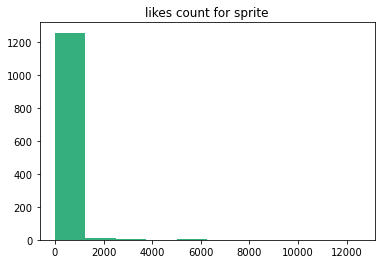

In [108]:
# for i in new_df_cocacola['replies_count']:
#     print(i)
for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    print("**************")
    plt.hist(i['replies_count'],color=j)
    plt.title(f"replies count for {k}")
    plt.show()

    plt.hist(i['retweets_count'],color=j)
    plt.title(f"retweet count for {k}")
    plt.show()

    plt.hist(i['likes_count'],color=j)
    plt.title(f"likes count for {k}")
    plt.show()
# plt.boxplot(new_df_cocacola['replies_count'])
# plt.show()
# new_df_pepsi['replies_count'].sum()/len(new_df_pepsi['replies_count'])

In [76]:
# calculating trimmed means for retweet count, replies count and likes count
# ----pepsi----
# stats.tmean(new_df_pepsi['replies_count'], (0, 50)) # replies
# # retweets
# # likes
# Counter(new_df_cocacola['likes_count'])
# # print("********")
# # Counter(new_df_cocacola['replies_count'])

*****************


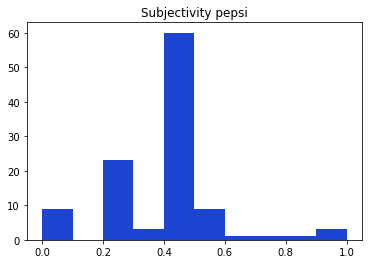

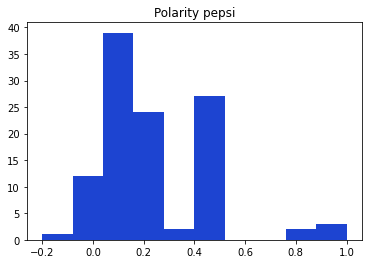

*****************


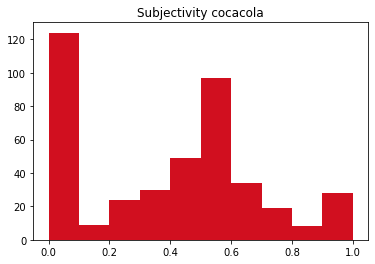

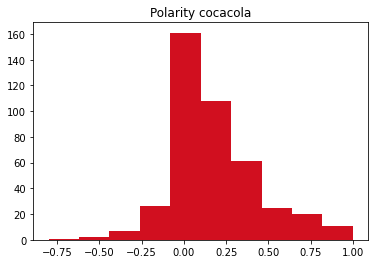

*****************


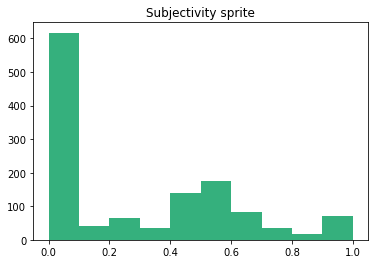

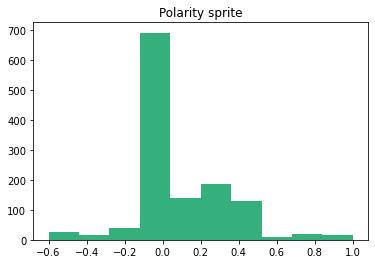

In [109]:
for i,j,k in zip(full_new_df_list,colors_for_bar,t):
    print("*****************")
    plt.hist(i['subjectivity'],color=j)
    plt.title(f'Subjectivity {k}')
    plt.show()
    plt.hist(i['polarity_from_blob'],color=j)
    plt.title(f'Polarity {k}')
    plt.show()

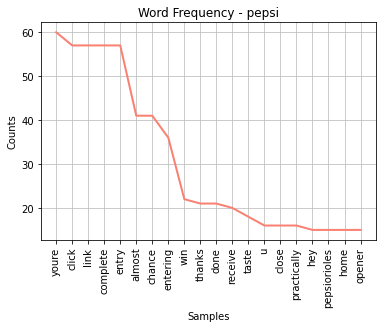

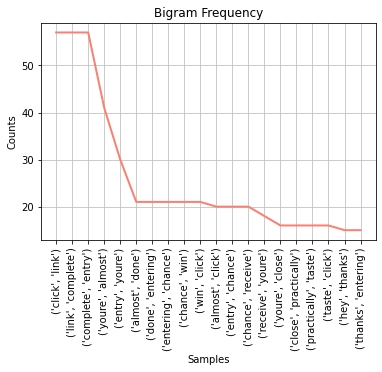

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [50]:
# work on the word frequency count
all_words_pepsi_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_pepsi['tokenized_comments']:
    all_words_pepsi_ini += i
all_words_pepsi_ini
nlp_words_pepsi = nltk.FreqDist(all_words_pepsi_ini)
plot2 = nlp_words_pepsi.plot(20, color='salmon', title='Word Frequency - pepsi')


bigrm = list(nltk.bigrams(all_words_pepsi_ini))
words_pepsi = nltk.FreqDist(bigrm)
words_pepsi.plot(20, color='salmon', title='Bigram Frequency')

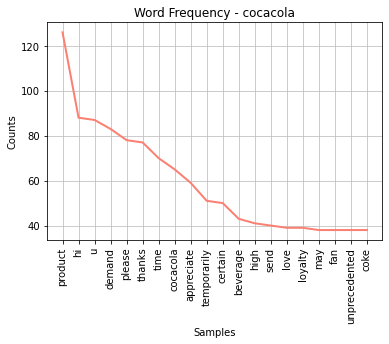

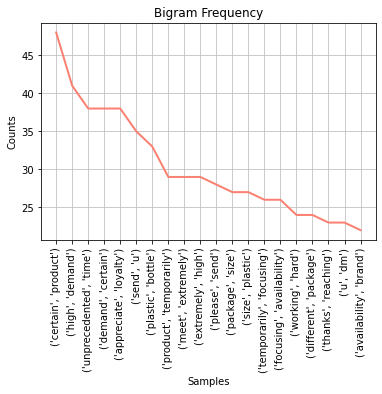

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [51]:
# work on the word frequency count
all_words_cocacola_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_cocacola['tokenized_comments']:
    all_words_cocacola_ini += i
all_words_cocacola_ini
nlp_words_cocacola = nltk.FreqDist(all_words_cocacola_ini)
plot3 = nlp_words_cocacola.plot(20, color='salmon', title='Word Frequency - cocacola')

bigrm = list(nltk.bigrams(all_words_cocacola_ini))
words_cocacola = nltk.FreqDist(bigrm)
words_cocacola.plot(20, color='salmon', title='Bigram Frequency')

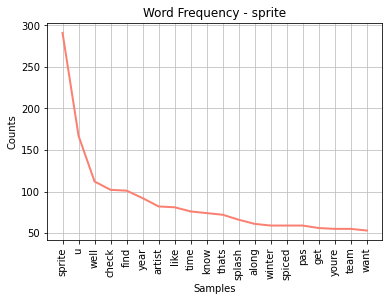

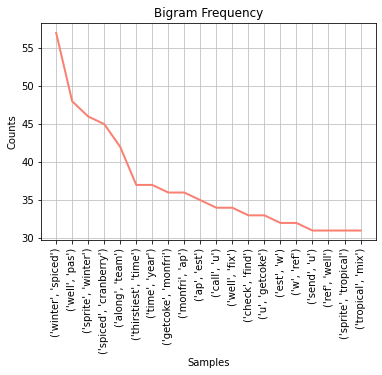

<AxesSubplot:title={'center':'Bigram Frequency'}, xlabel='Samples', ylabel='Counts'>

In [52]:
# work on the word frequency count
all_words_sprite_ini = []
# all_words_pepsi = [i+all_words_pepsi_ini for i in new_df_pepsi['tokenized_comments']]
for i in new_df_sprite['tokenized_comments']:
    all_words_sprite_ini += i
all_words_sprite_ini
nlp_words_sprite = nltk.FreqDist(all_words_sprite_ini)
plot4 = nlp_words_sprite.plot(20, color='salmon', title='Word Frequency - sprite')

bigrm = list(nltk.bigrams(all_words_sprite_ini))
words_sprite = nltk.FreqDist(bigrm)
words_sprite.plot(20, color='salmon', title='Bigram Frequency')

In [106]:
# transformer analysis
dumb = new_df_pepsi[new_df_pepsi["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for pepsi    ",dict(Counter(dumb)))

dumb = new_df_cocacola[new_df_cocacola["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for cocacola ",dict(Counter(dumb)))

dumb = new_df_sprite[new_df_sprite["subjectivity"]>0.5].transformer_score.apply(lambda x: x[0]['label'])
print("for sprite   ",dict(Counter(dumb)))

for pepsi     {'NEGATIVE': 3, 'POSITIVE': 5}
for cocacola  {'NEGATIVE': 57, 'POSITIVE': 115}
for sprite    {'POSITIVE': 217, 'NEGATIVE': 105}


In [38]:
# samplelist= []
# count = 0
# for i in new_df_pepsi['photos']:
#     if i != []:
#         count += 1
# print(count)
new_df_pepsi.iloc[1]

id                                                  1389988262891032579
conversation_id                                     1389988262891032576
created_at                2021-05-06 03:00:01 AUS Eastern Standard Time
date                                                2021-05-06 00:00:00
time                                                           03:00:01
timezone                                                           1000
user_id                                                        18139619
username                                                          pepsi
name                                                              Pepsi
place                                                                  
tweet                 Do you think @onyekaehie and @harryjowsey are ...
language                                                             en
mentions              [{'screen_name': 'onyekaehie', 'name': 'onyeka...
urls                                                            